In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
import seaborn as sns
from scipy.stats import chi2_contingency
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2, l1
from imblearn.over_sampling import SMOTE

2024-01-05 07:02:57.853628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 07:02:57.853667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 07:02:57.854535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 07:02:57.860710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Importing the data set

In [2]:
# Load data
file_path = './Acc_pred_revised.xlsx'
data = pd.read_excel(file_path)
data.columns.to_list()

['Unnamed: 0',
 'No. ',
 'Crash_Time_Cat',
 'Week Day',
 'Crash Type',
 'Causes of Crash',
 'Accident Severity Level',
 'Direction',
 'Geometrical Condition Type',
 'Road Surface Conditions',
 'Weather Condition',
 'Light Condition',
 'Vehicle_Type_Cat',
 'Maufactured_Year_Cat',
 'Vehicle Ownership',
 'Driver_Age_Cat',
 'Sex',
 'Marital Status',
 'License Level',
 'Driving License Issuing Region',
 'Driver_Exp_Cat',
 'Driver Education Level',
 'Driver Relationship with Vehicle']

   Unnamed: 0  No.  Crash_Time_Cat Week Day                 Crash Type  \
0           0     1              C   Sunday              Car Overthrow   
1           1     2              B  Tuesday                      Other   
2           2     3              A  Tuesday              Car Overthrow   
3           3     4              A   Monday                      Other   
4           4     5              C   Friday  Crash with fixed obstacle   

  Causes of Crash Accident Severity Level       Direction  \
0    Driver Error            Light Injury        To Adama   
1           Other               No Injury  To Addis Ababa   
2  Vechile Defect            Light Injury    Toll Station   
3           Other               No Injury        To Adama   
4    Driver Error            Light Injury  To Addis Ababa   

  Geometrical Condition Type Road Surface Conditions  ...  \
0                   Straight                     Dry  ...   
1                   Straight                     Dry  ...   
2    

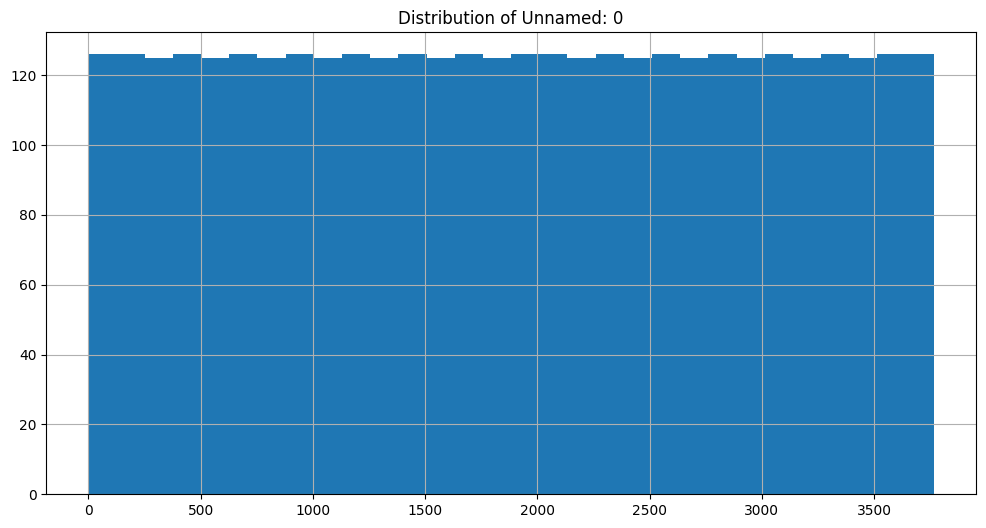

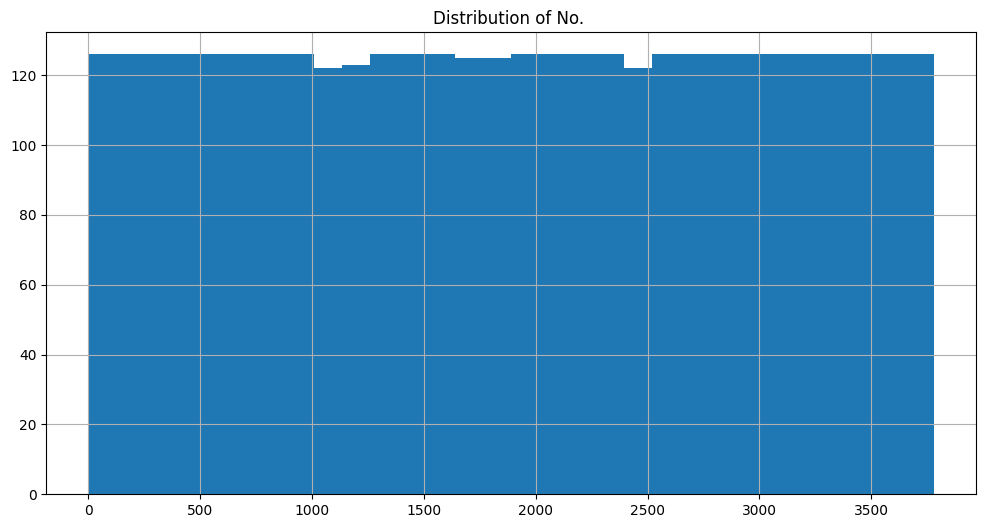

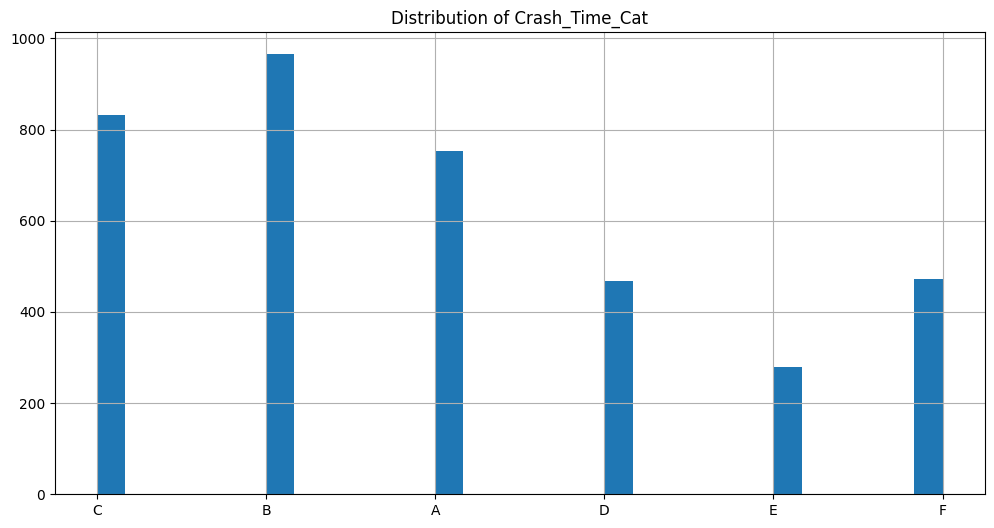

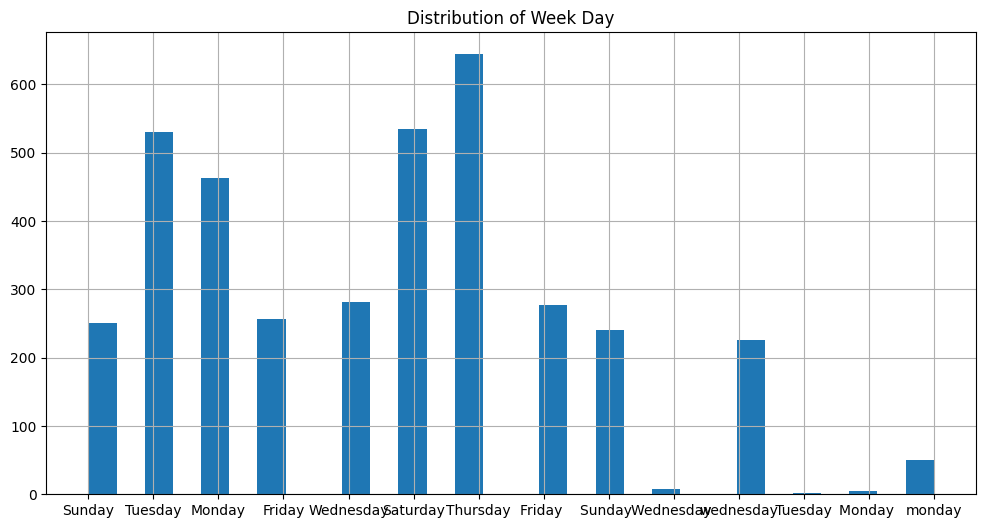

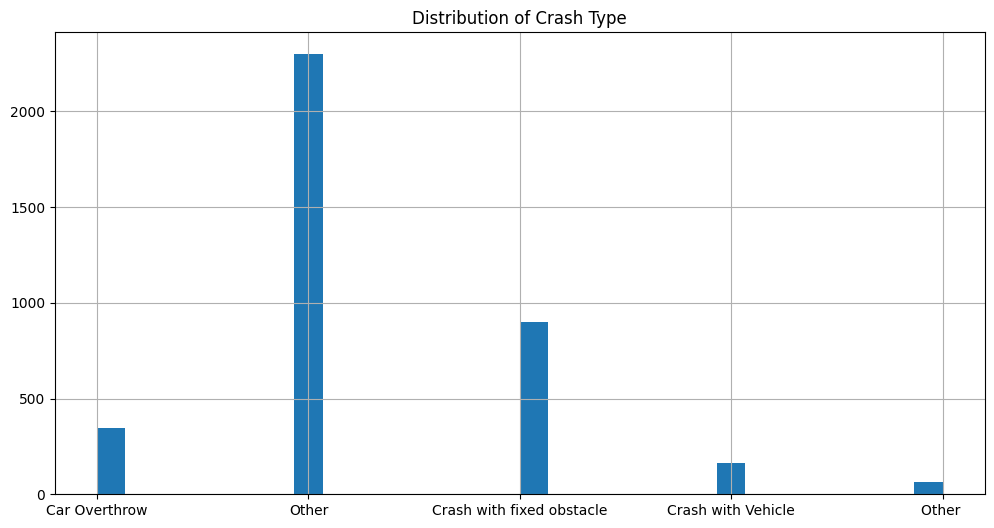

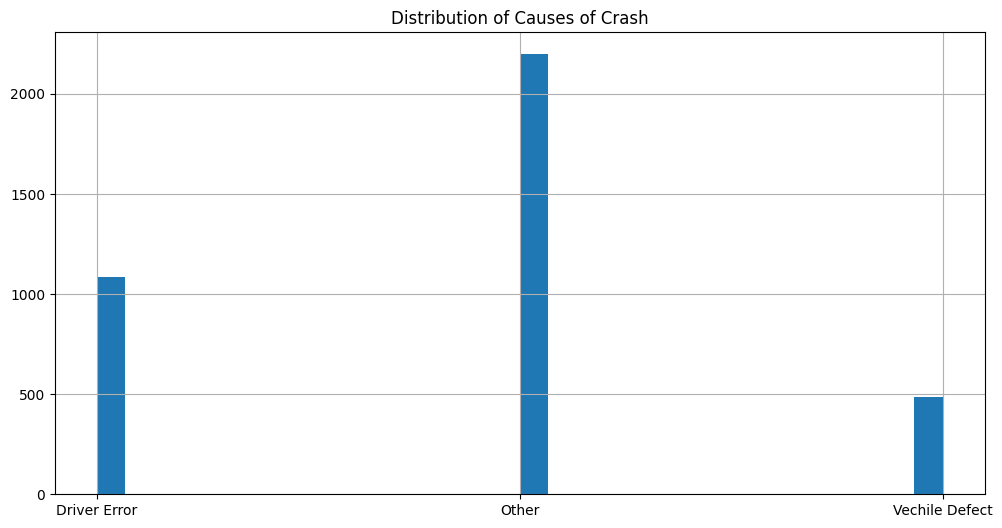

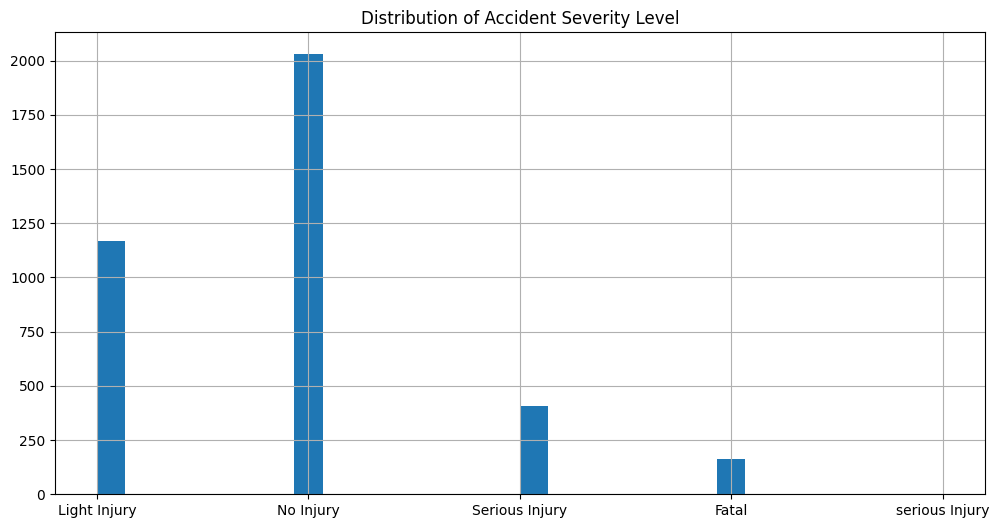

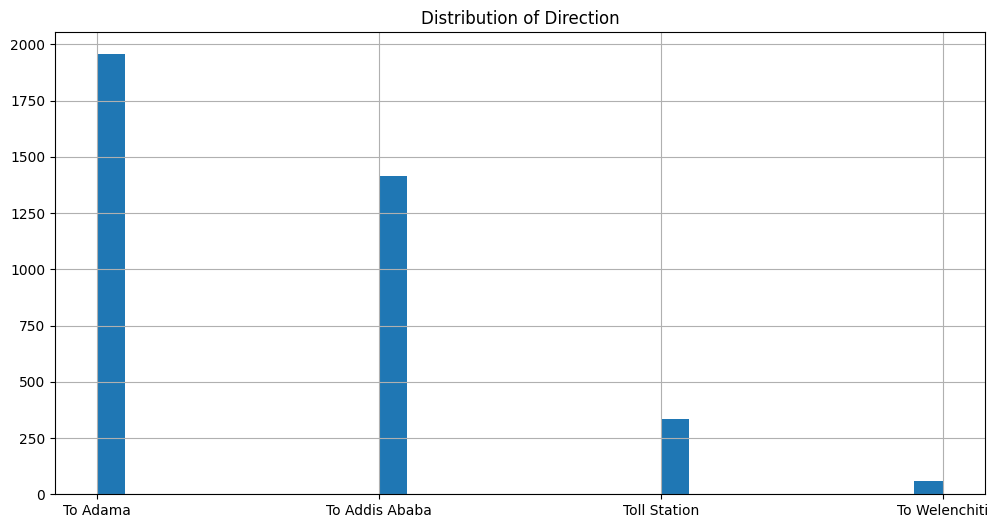

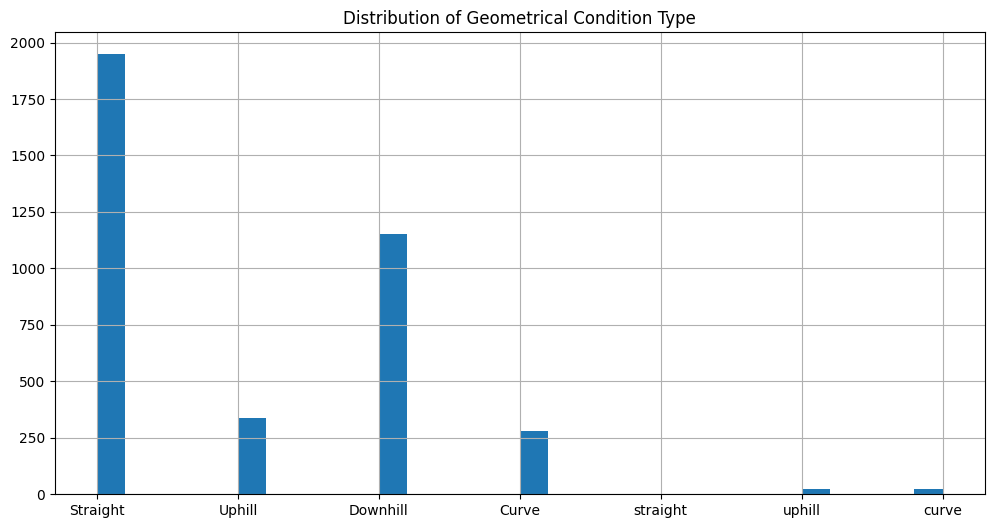

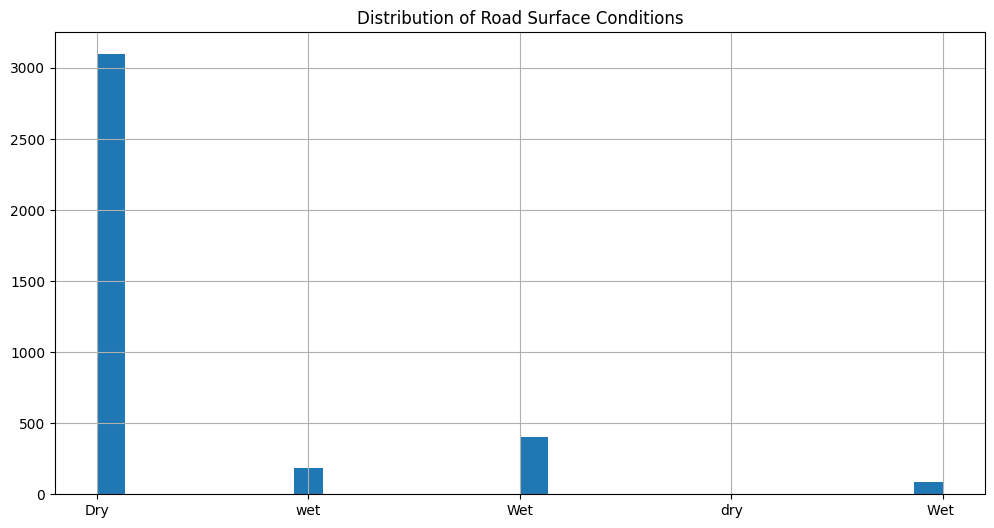

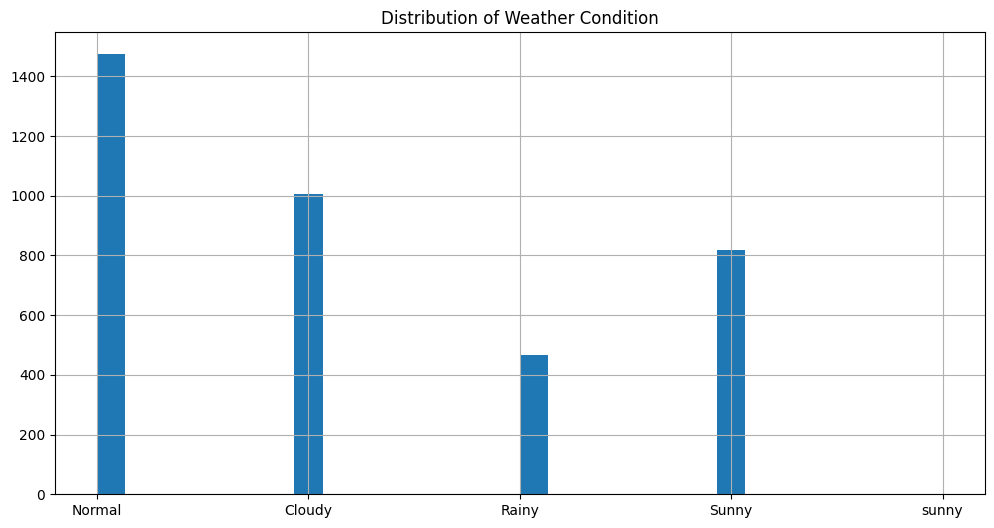

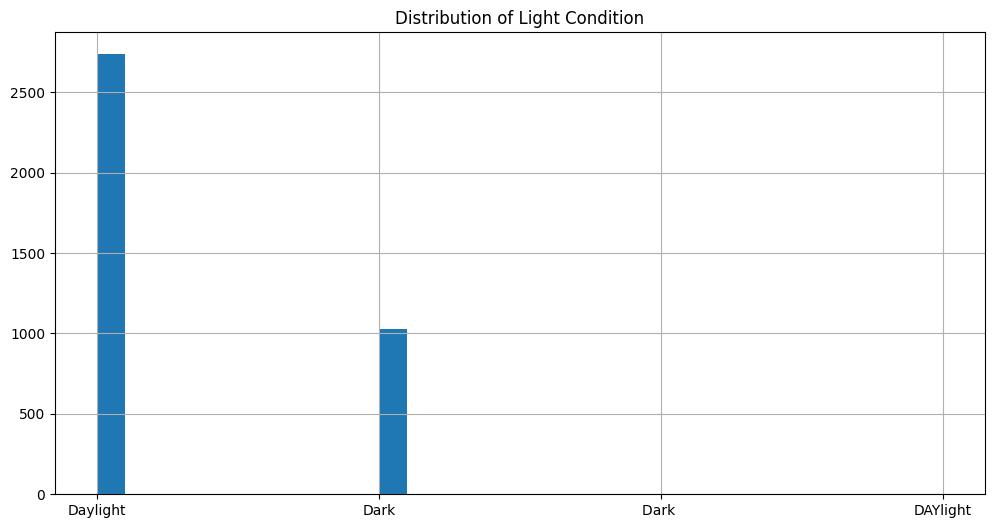

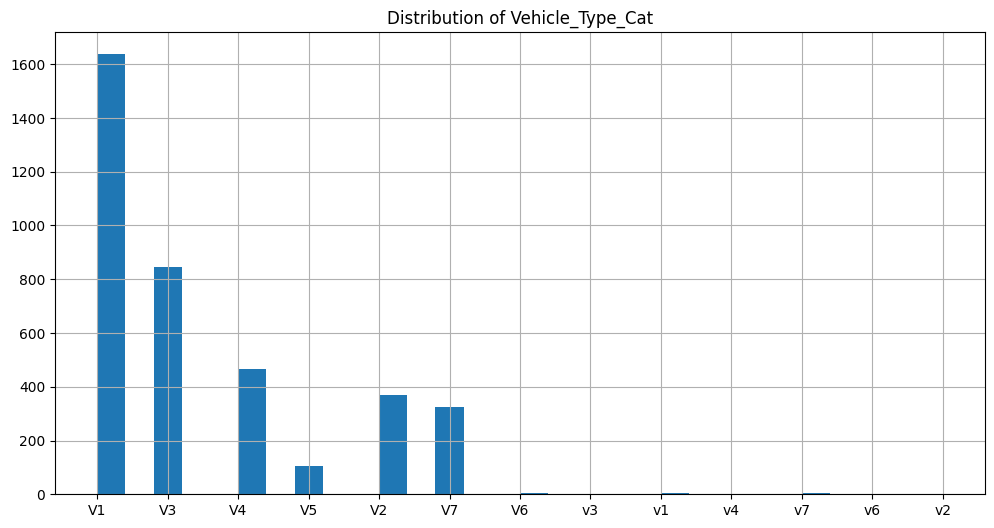

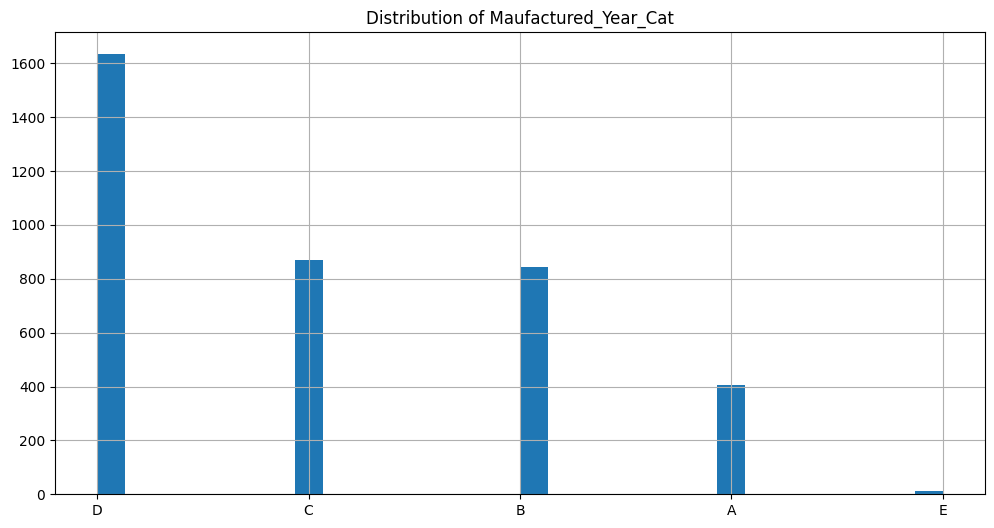

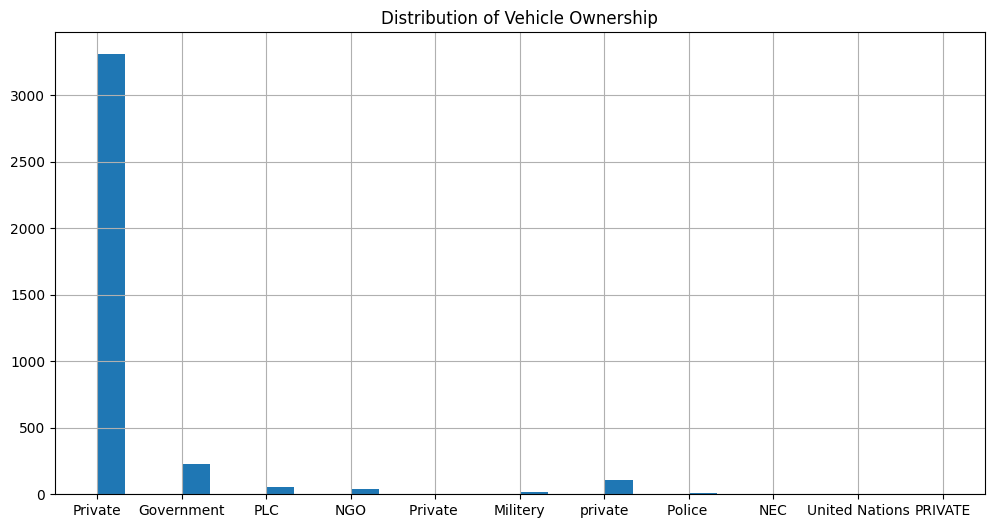

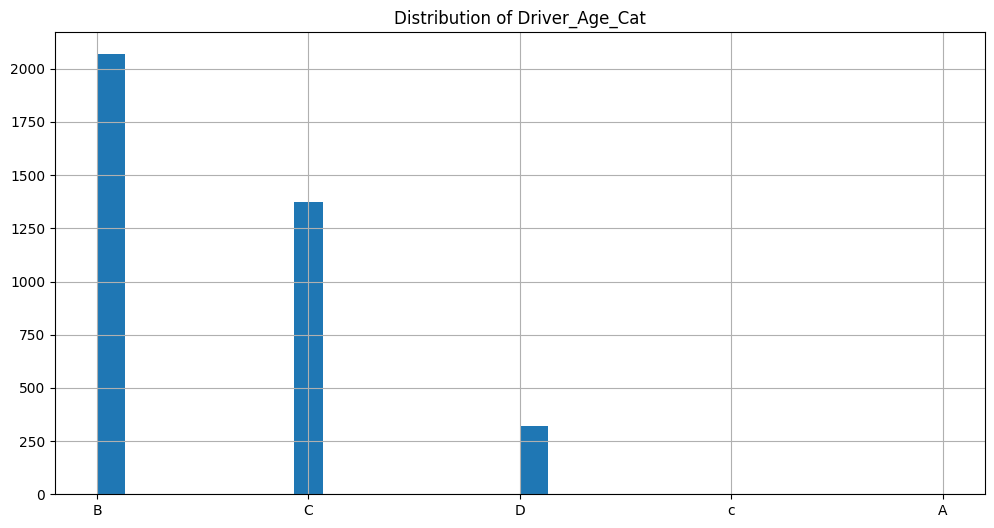

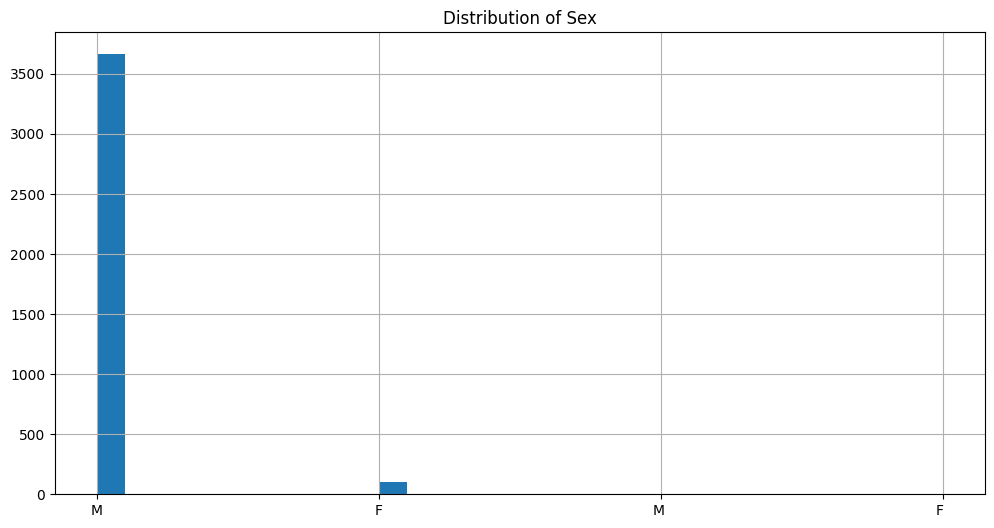

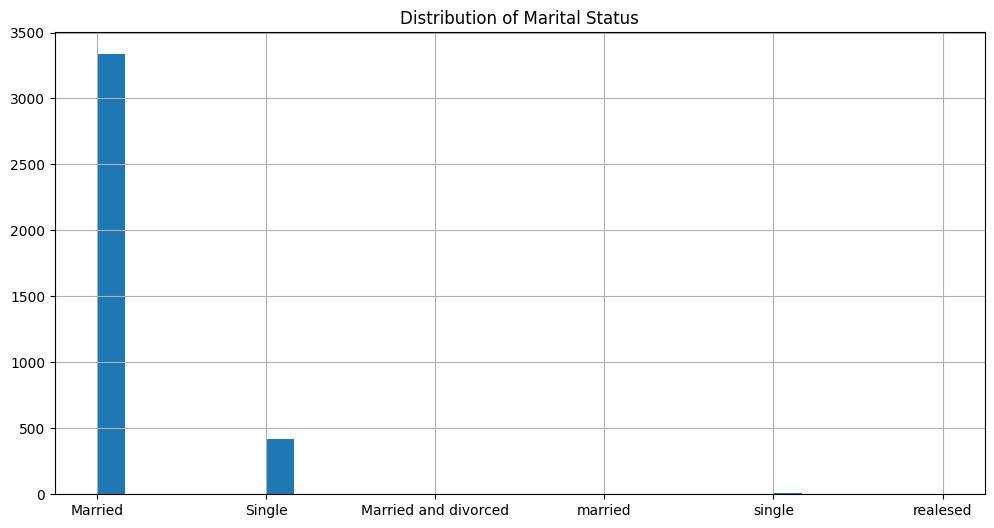

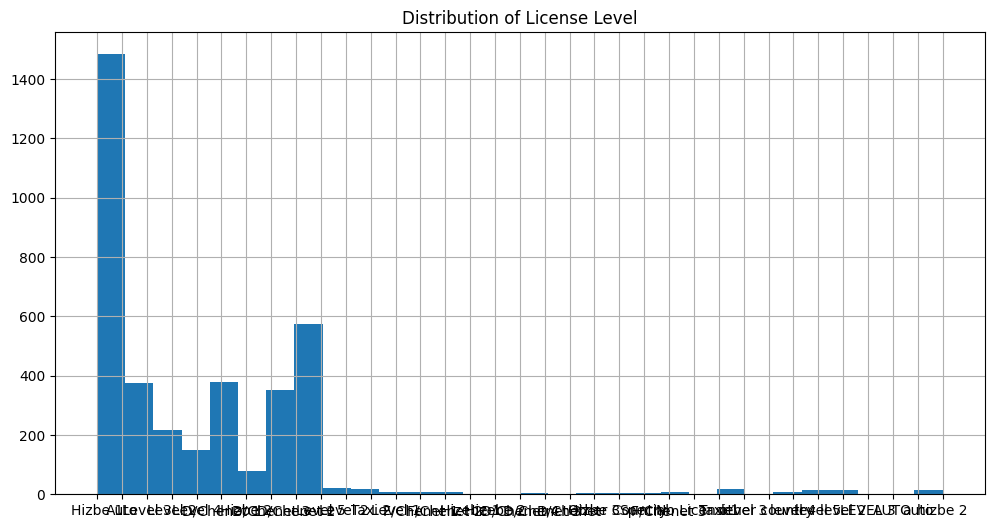

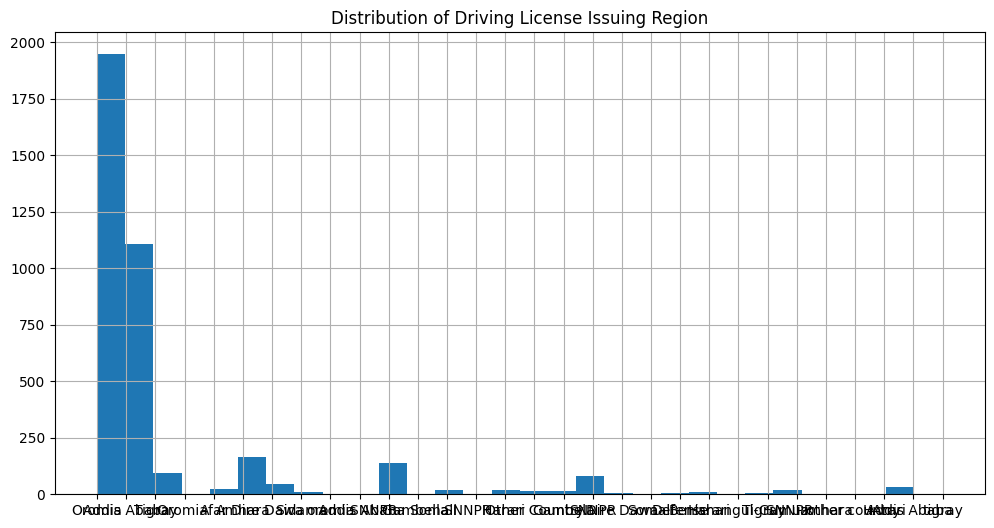

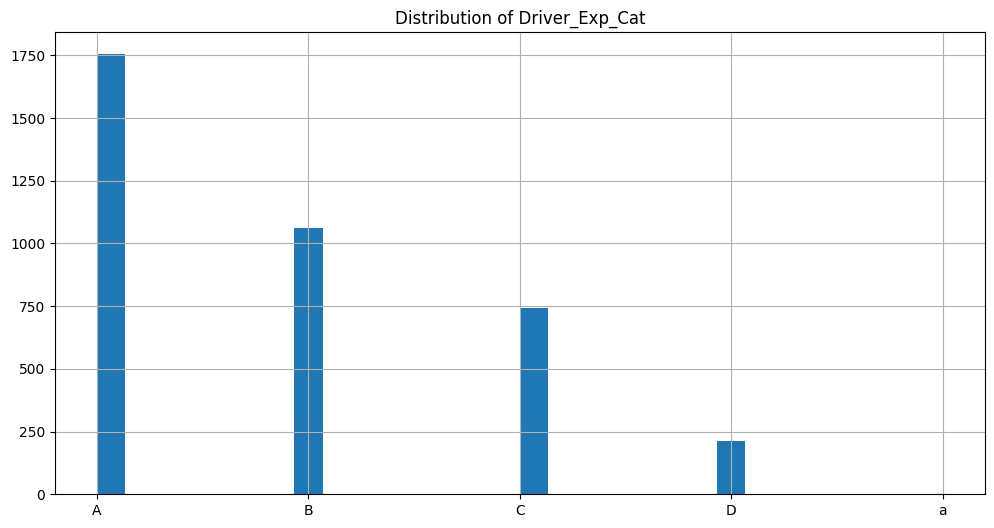

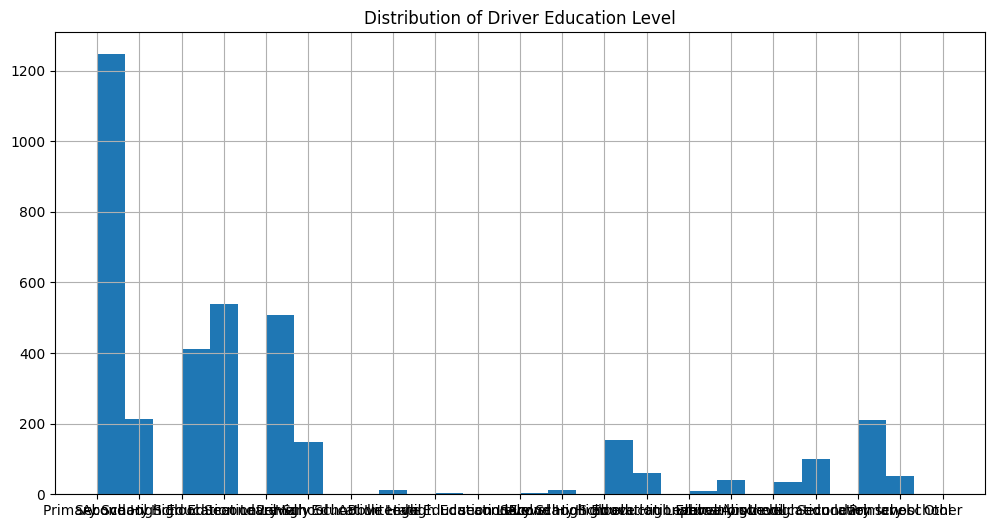

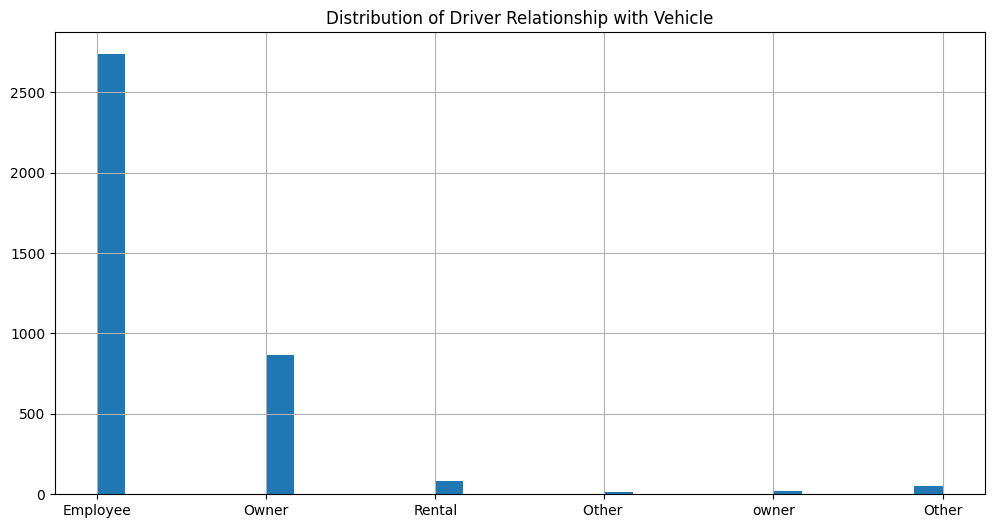

ValueError: could not convert string to float: 'C'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Assuming 'data' is your DataFrame

# Display the first few rows of the DataFrame
print(data.head())

# Display the summary statistics of the numerical columns
print(data.describe())

# Display the distribution of each column
for column in data.columns:
  plt.figure(figsize=(12, 6))
  data[column].hist(bins=30)
  plt.title(f'Distribution of {column}')
  plt.show()

# Display the correlation matrix
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the missing values
msno.bar(data)
plt.title('Missing Values')
plt.show()
# Display the correlation matrix
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the missing values
msno.bar(data)
plt.title('Missing Values')
plt.show()


# Data Pre-processing

Handling Missing values

In [4]:
# 1. Drop columns
data = data.drop(columns=['No. '])

In [5]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Unnamed: 0                          0.0
Crash_Time_Cat                      0.0
Week Day                            0.0
Crash Type                          0.0
Causes of Crash                     0.0
Accident Severity Level             0.0
Direction                           0.0
Geometrical Condition Type          0.0
Road Surface Conditions             0.0
Weather Condition                   0.0
Light Condition                     0.0
Vehicle_Type_Cat                    0.0
Maufactured_Year_Cat                0.0
Vehicle Ownership                   0.0
Driver_Age_Cat                      0.0
Sex                                 0.0
Marital Status                      0.0
License Level                       0.0
Driving License Issuing Region      0.0
Driver_Exp_Cat                      0.0
Driver Education Level              0.0
Driver Relationship with Vehicle    0.0
dtype: float64


In [6]:
# dropping martial status since 69% of the data is missing
data = data.drop(columns=['Marital Status'])

In [7]:
# counting the total rows with missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

Unnamed: 0                          0
Crash_Time_Cat                      0
Week Day                            0
Crash Type                          0
Causes of Crash                     0
Accident Severity Level             0
Direction                           0
Geometrical Condition Type          0
Road Surface Conditions             0
Weather Condition                   0
Light Condition                     0
Vehicle_Type_Cat                    0
Maufactured_Year_Cat                0
Vehicle Ownership                   0
Driver_Age_Cat                      0
Sex                                 0
License Level                       0
Driving License Issuing Region      0
Driver_Exp_Cat                      0
Driver Education Level              0
Driver Relationship with Vehicle    0
dtype: int64


In [8]:
# Displaying the datatypes of the columns with the missing values
print(data.dtypes)

Unnamed: 0                           int64
Crash_Time_Cat                      object
Week Day                            object
Crash Type                          object
Causes of Crash                     object
Accident Severity Level             object
Direction                           object
Geometrical Condition Type          object
Road Surface Conditions             object
Weather Condition                   object
Light Condition                     object
Vehicle_Type_Cat                    object
Maufactured_Year_Cat                object
Vehicle Ownership                   object
Driver_Age_Cat                      object
Sex                                 object
License Level                       object
Driving License Issuing Region      object
Driver_Exp_Cat                      object
Driver Education Level              object
Driver Relationship with Vehicle    object
dtype: object


In [9]:
# 2. Fill missing values
# since the missing values are categorical, we will fill them with the mode iterating through every column
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
missing_values_count = data.isnull().sum()
missing_values_count

Unnamed: 0                          0
Crash_Time_Cat                      0
Week Day                            0
Crash Type                          0
Causes of Crash                     0
Accident Severity Level             0
Direction                           0
Geometrical Condition Type          0
Road Surface Conditions             0
Weather Condition                   0
Light Condition                     0
Vehicle_Type_Cat                    0
Maufactured_Year_Cat                0
Vehicle Ownership                   0
Driver_Age_Cat                      0
Sex                                 0
License Level                       0
Driving License Issuing Region      0
Driver_Exp_Cat                      0
Driver Education Level              0
Driver Relationship with Vehicle    0
dtype: int64

In [10]:
# 3. displaying the unique values in each column
for col in data.columns:
    print(col, data[col].unique())

Unnamed: 0 [   0    1    2 ... 3764 3765 3766]
Crash_Time_Cat ['C' 'B' 'A' 'D' 'E' 'F']
Week Day ['Sunday' 'Tuesday' 'Monday' 'Friday' 'Wednesday' 'Saturday' 'Thursday'
 'Friday ' 'Sunday ' 'Wednesday ' 'wednesday' ' Tuesday ' 'Monday '
 'monday']
Crash Type ['Car Overthrow' 'Other' 'Crash with fixed obstacle' 'Crash with Vehicle'
 'Other ']
Causes of Crash ['Driver Error' 'Other' 'Vechile Defect']
Accident Severity Level ['Light Injury' 'No Injury' 'Serious Injury' 'Fatal' 'serious Injury']
Direction ['To Adama' 'To Addis Ababa' 'Toll Station' 'To Welenchiti']
Geometrical Condition Type ['Straight' 'Uphill' 'Downhill' 'Curve' 'straight' 'uphill' 'curve']
Road Surface Conditions ['Dry' 'wet' 'Wet' 'dry' 'Wet ']
Weather Condition ['Normal' 'Cloudy' 'Rainy' 'Sunny' 'sunny']
Light Condition ['Daylight' 'Dark' 'Dark ' 'DAYlight']
Vehicle_Type_Cat ['V1' 'V3' 'V4' 'V5' 'V2' 'V7' 'V6' 'v3' 'v1' 'v4' 'v7' 'v6' 'v2']
Maufactured_Year_Cat ['D' 'C' 'B' 'A' 'E']
Vehicle Ownership ['Private' 'Gover

In [11]:
# 4. replacing the values in the columns with the correct values
# capitalizing every value in the following columns to make them uniform
columns_to_capitalize = ['Week Day','Crash Type','Causes of Crash','Accident Severity Level','Direction','Geometrical Condition Type','Road Surface Conditions','Weather Condition','Light Condition','Vehicle_Type_Cat','Vehicle Ownership','Driver_Age_Cat','Sex','License Level','Driver Relationship with Vehicle','Driving License Issuing Region','Driver_Exp_Cat','Driver Education Level']
# checking if the columns are in the dataframe
for col in columns_to_capitalize:
    if col in data.columns:
        data[col] = data[col].str.capitalize()
    else:
        print(col, 'not in dataframe')

# capitalizing and trimming the values in the following columns to make them uniform
for col in columns_to_capitalize:
    if col in data.columns:
        data[col] = data[col].str.upper()
        data[col] = data[col].str.strip()
        data[col] = data[col].str.replace('  ', ' ')
        data[col] = data[col].str.replace(' ', '_')
        data[col] = data[col].str.replace('-', '')
        data[col] = data[col].str.replace('!', '1')
    else:
        print(col, 'not in dataframe')

# replacing the values in the following columns with the correct values
data['Vehicle Ownership'] = data['Vehicle Ownership'].str.replace('NEC', 'NGO')
data['License Level'] = data['License Level'].str.replace('HIZEBE_1', 'HIZBE_1')
data['License Level'] = data['License Level'].str.replace('HIZEBE_2', 'HIZBE_2')
data['License Level'] = data['License Level'].str.replace('HIZEBE_3', 'HIZBE_3')
data['License Level'] = data['License Level'].str.replace('D/CHENET_1', 'D/CHENET')
data['Driving License Issuing Region'] = data['Driving License Issuing Region'].str.replace('GAMBELLA', 'GAMBELA')

# checking the unique values in the columns
for col in data.columns:
    print(col)


Unnamed: 0
Crash_Time_Cat
Week Day
Crash Type
Causes of Crash
Accident Severity Level
Direction
Geometrical Condition Type
Road Surface Conditions
Weather Condition
Light Condition
Vehicle_Type_Cat
Maufactured_Year_Cat
Vehicle Ownership
Driver_Age_Cat
Sex
License Level
Driving License Issuing Region
Driver_Exp_Cat
Driver Education Level
Driver Relationship with Vehicle


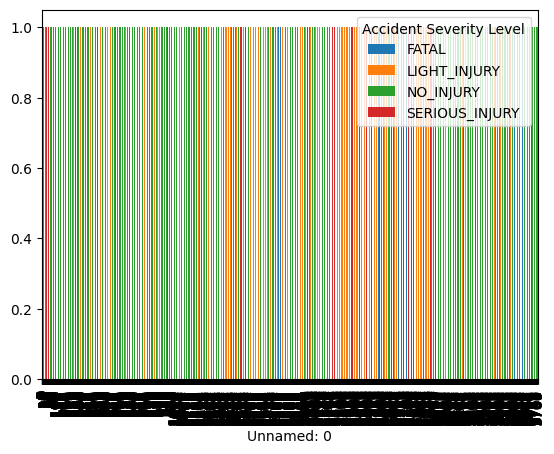

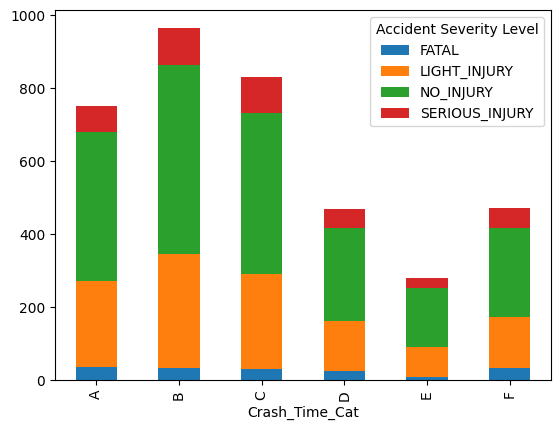

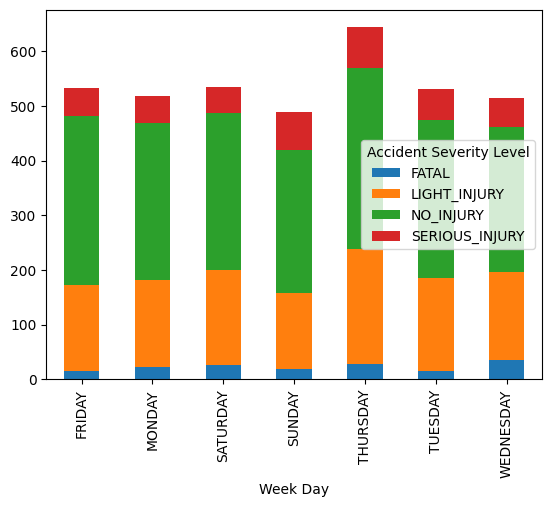

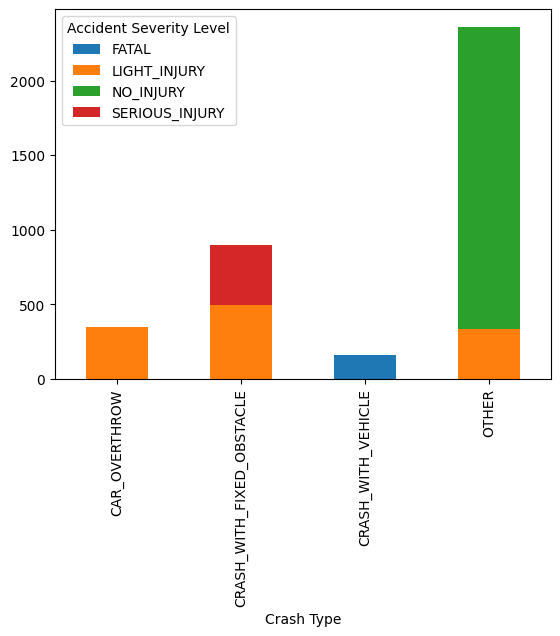

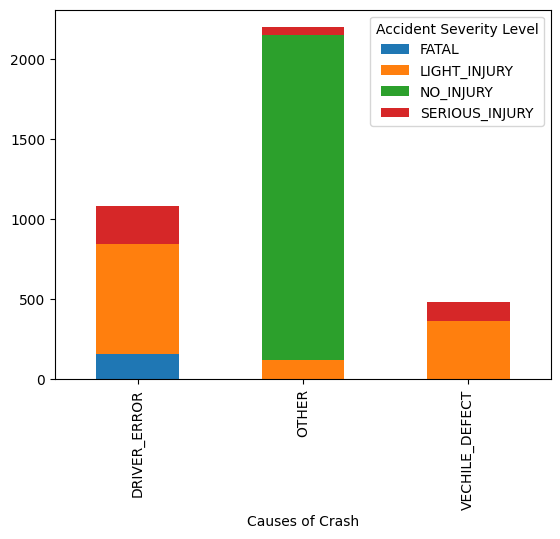

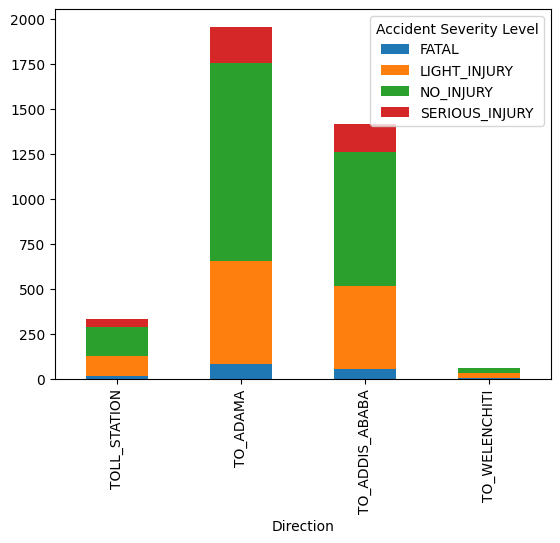

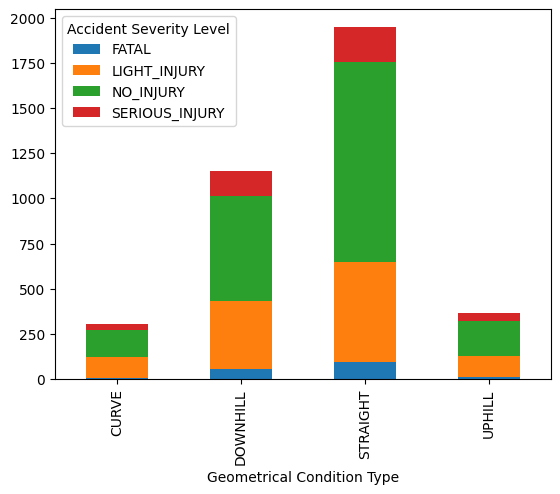

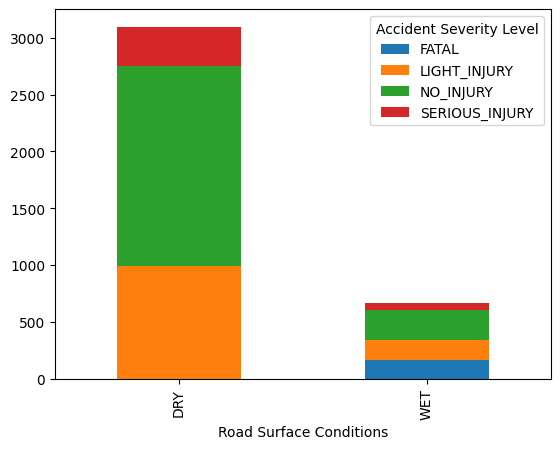

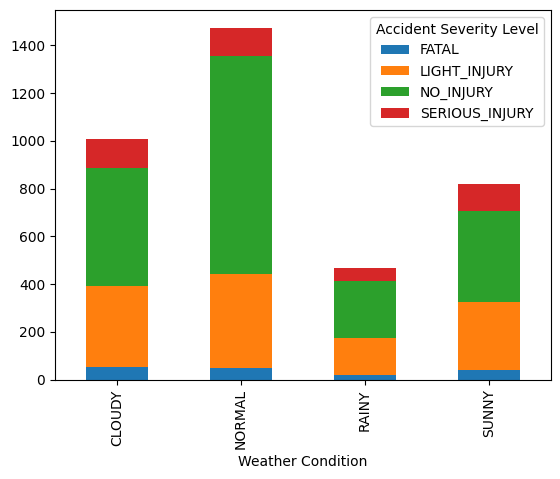

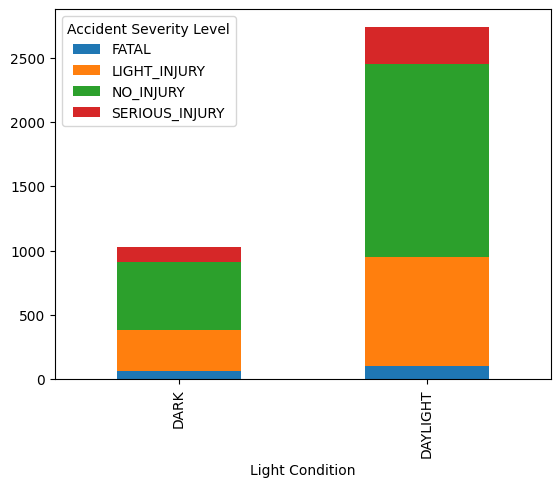

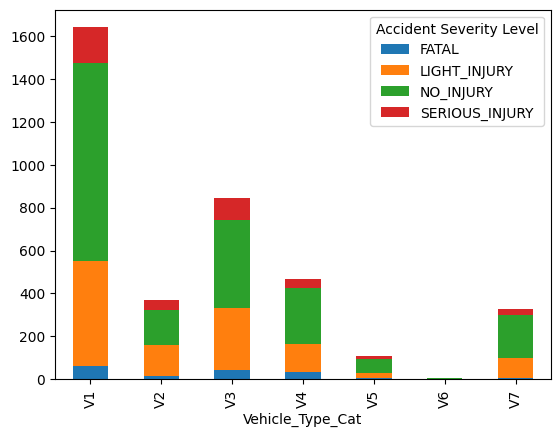

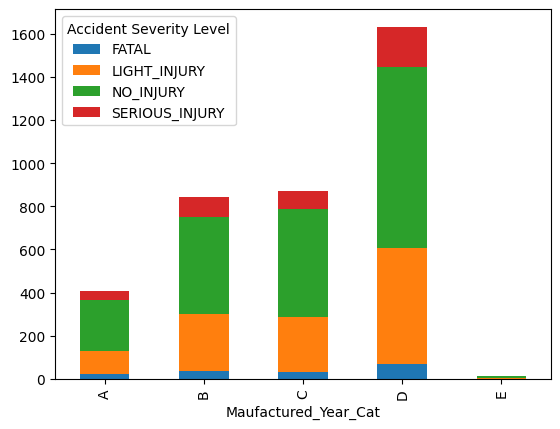

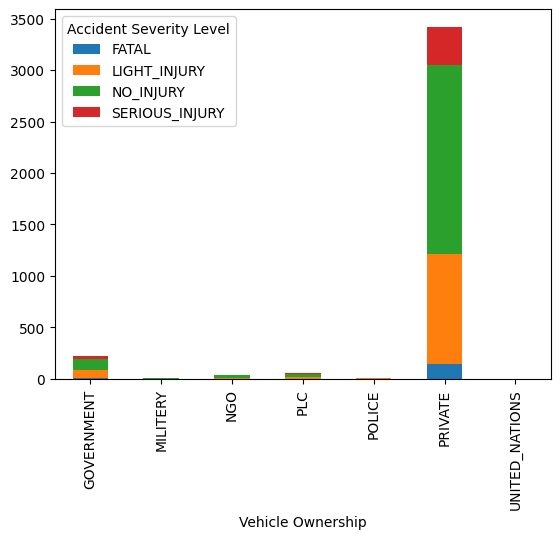

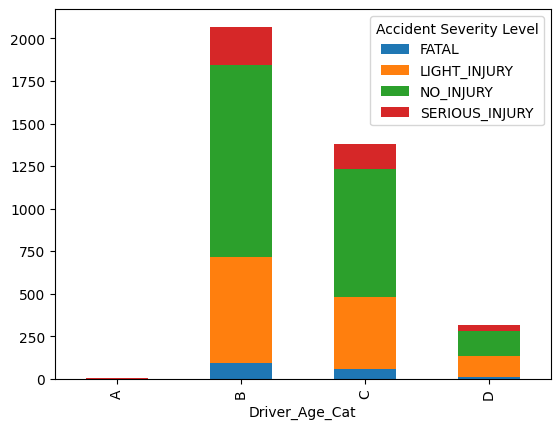

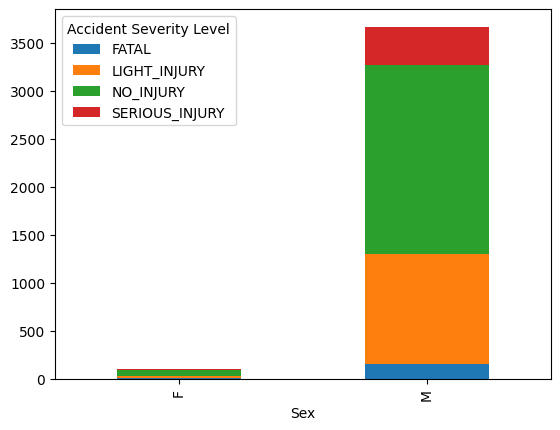

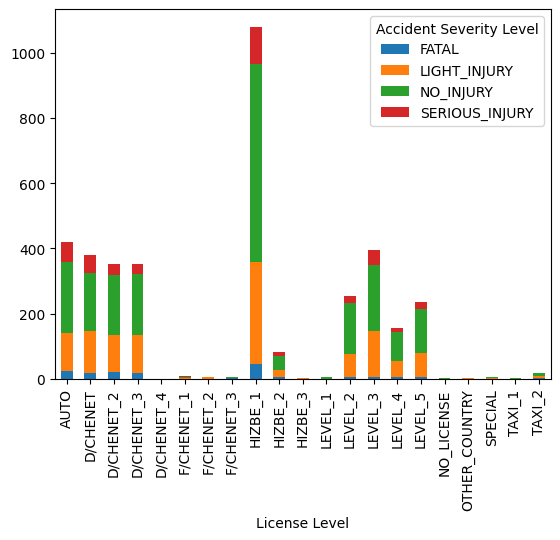

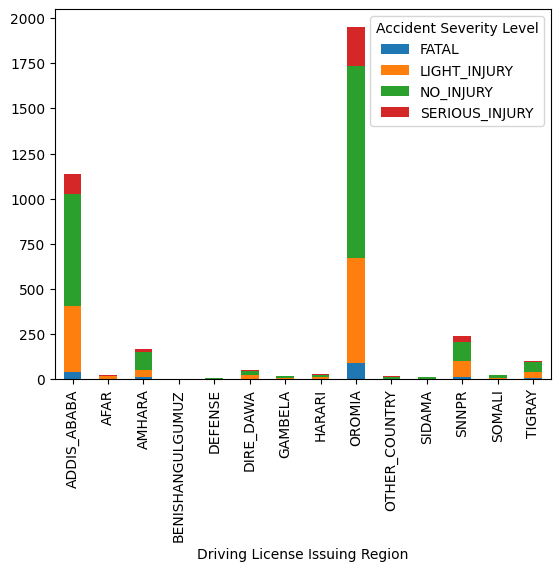

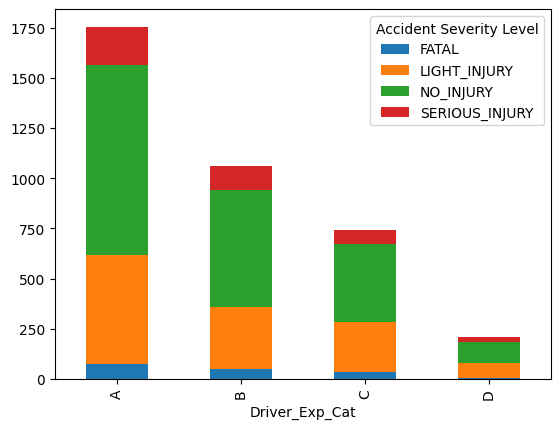

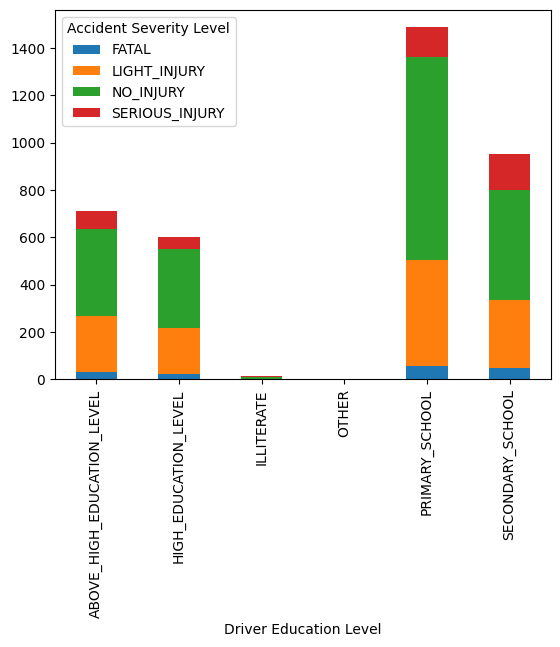

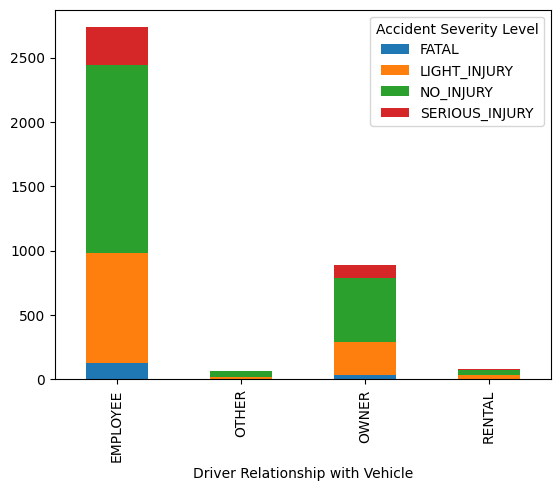

Unnamed: 0  Accident Severity Level
0           LIGHT_INJURY               1
1           NO_INJURY                  1
2           LIGHT_INJURY               1
3           NO_INJURY                  1
4           LIGHT_INJURY               1
                                      ..
3762        NO_INJURY                  1
3763        NO_INJURY                  1
3764        SERIOUS_INJURY             1
3765        NO_INJURY                  1
3766        NO_INJURY                  1
Name: count, Length: 3767, dtype: int64
Crash_Time_Cat  Accident Severity Level
A               NO_INJURY                  408
                LIGHT_INJURY               238
                SERIOUS_INJURY              72
                FATAL                       34
B               NO_INJURY                  518
                LIGHT_INJURY               314
                SERIOUS_INJURY             101
                FATAL                       32
C               NO_INJURY                  441
          

In [12]:
# displaying the relation ship of every column with accident severity level column using graphs
for col in data.columns:
    if col != 'Accident Severity Level':
        data.groupby(col)['Accident Severity Level'].value_counts().unstack().plot(kind='bar', stacked=True)
        plt.show()
# printing the relation ship of every column with accident severity level column using numbers
for col in data.columns:
    if col != 'Accident Severity Level':
        print(data.groupby(col)['Accident Severity Level'].value_counts())

In [13]:
# 5. Encoding categorical data
# encoding the categorical data using one hot encoding

label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])
        print(col, data[col].unique())

Crash_Time_Cat [2 1 0 3 4 5]
Week Day [3 5 1 0 6 2 4]
Crash Type [0 3 1 2]
Causes of Crash [0 1 2]
Accident Severity Level [1 2 3 0]
Direction [1 2 0 3]
Geometrical Condition Type [2 3 1 0]
Road Surface Conditions [0 1]
Weather Condition [1 0 2 3]
Light Condition [1 0]
Vehicle_Type_Cat [0 2 3 4 1 6 5]
Maufactured_Year_Cat [3 2 1 0 4]
Vehicle Ownership [5 0 3 2 1 4 6]
Driver_Age_Cat [1 2 3 0]
Sex [1 0]
License Level [ 8  0 13 12 14  1  9  3  2 15 20 11  5  6  4 10 17 18  7 16 19]
Driving License Issuing Region [ 8  0 13  1  2  5 10 11  6 12  7  9  4  3]
Driver_Exp_Cat [0 1 2 3]
Driver Education Level [4 5 0 1 2 3]
Driver Relationship with Vehicle [0 2 3 1]


In [14]:
# 6.Calculate the correlation matrix
# Select categorical columns for which you want to calculate Cramér's V
categorical_columns = ['Crash Type', 'Causes of Crash', 'Direction', 'Geometrical Condition Type',
                        'Road Surface Conditions', 'Weather Condition', 'Light Condition',
                        'Vehicle_Type_Cat', 'Maufactured_Year_Cat', 'Vehicle Ownership',
                        'Driver_Age_Cat', 'Sex', 'License Level',
                        'Driving License Issuing Region', 'Driver_Exp_Cat', 'Driver Education Level',
                        'Driver Relationship with Vehicle', 'Accident Severity Level']

# Create a contingency table for each pair of categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each pair of categorical variables
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Display the matrix of Cramér's V values
print("Cramér's V Matrix:")
print(cramers_v_matrix)

Cramér's V Matrix:
                                 Crash Type Causes of Crash Direction  \
Crash Type                              1.0        0.576915  0.061087   
Causes of Crash                    0.576915             1.0  0.048772   
Direction                          0.061087        0.048772       1.0   
Geometrical Condition Type         0.042634        0.039038  0.216703   
Road Surface Conditions            0.455701        0.174186  0.018573   
Weather Condition                  0.055421        0.098414  0.040824   
Light Condition                    0.051822        0.069315  0.065772   
Vehicle_Type_Cat                   0.065687        0.095931  0.074166   
Maufactured_Year_Cat               0.020005        0.024891       0.0   
Vehicle Ownership                  0.030654        0.021595  0.074651   
Driver_Age_Cat                      0.03167        0.028731  0.013169   
Sex                                     0.0             0.0  0.025565   
License Level                   

Drop "Light Condition":

Explanation: "Light Condition" is strongly associated with "Weather Condition" (Cramér's V = 0.509982), suggesting redundancy. Additionally, "Light Condition" has a weak association with the target "Accident Severity Level" (Cramér's V = 0.049759).
Drop "Vehicle_Type_Cat":

Explanation: "Vehicle_Type_Cat" is strongly associated with "License Level" (Cramér's V = 0.323169), indicating redundancy. While it has a moderate association with the target, other variables may provide similar or better predictive power.
Drop "Direction," "Maufactured_Year_Cat," "Driver_Exp_Cat," and "Driver Relationship with Vehicle":

Explanation: These variables show weak or negligible associations with the target "Accident Severity Level" and may not contribute significantly to the predictive power of the model

In [15]:
# List of columns to drop based on recommendations
columns_to_drop = ['Light Condition', 'Vehicle_Type_Cat', 'Direction', 
                  'Maufactured_Year_Cat', 'Driver_Exp_Cat', 'Driver Relationship with Vehicle']

# Drop the specified columns from the dataframe
data.drop(columns=columns_to_drop, inplace=True)

# Verify the updated dataframe
print(data.head())

   Unnamed: 0  Crash_Time_Cat  Week Day  Crash Type  Causes of Crash  \
0           0               2         3           0                0   
1           1               1         5           3                1   
2           2               0         5           0                2   
3           3               0         1           3                1   
4           4               2         0           1                0   

   Accident Severity Level  Geometrical Condition Type  \
0                        1                           2   
1                        2                           2   
2                        1                           2   
3                        2                           2   
4                        1                           2   

   Road Surface Conditions  Weather Condition  Vehicle Ownership  \
0                        0                  1                  5   
1                        0                  1                  5   
2             

In [16]:
# Calculate the distribution of the target variable
target_distribution = data['Accident Severity Level'].value_counts()

# Display the distribution
print(target_distribution)


Accident Severity Level
2    2029
1    1170
3     407
0     161
Name: count, dtype: int64


In [17]:
# 7. Defining features and target
features = data.drop(['Accident Severity Level'], axis=1)
targets = to_categorical(data['Accident Severity Level']) # one hot encoding

In [18]:
targets

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

## Splitting the data into training and testing

In [19]:
# 8. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [20]:
# standardizing the input measures
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training

2024-01-05 07:04:16.791281: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 07:04:16.801724: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 07:04:16.802116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/200


2024-01-05 07:04:18.627505: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9abd16d750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 07:04:18.627543: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-01-05 07:04:18.634684: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-05 07:04:18.656549: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1704427458.748296   48086 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/95 [==============================] - 3s 5ms/step - loss: 0.8174 - accuracy: 0.6847 - val_loss: 0.5005 - val_accuracy: 0.7812
Epoch 2/200
95/95 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7979 - val_loss: 0.3741 - val_accuracy: 0.8475
Epoch 3/200
95/95 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8331 - val_loss: 0.3130 - val_accuracy: 0.8568
Epoch 4/200
95/95 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8599 - val_loss: 0.2832 - val_accuracy: 0.8780
Epoch 5/200
95/95 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8726 - val_loss: 0.2760 - val_accuracy: 0.8780
Epoch 6/200
95/95 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8749 - val_loss: 0.2594 - val_accuracy: 0.8833
Epoch 7/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2739 - accuracy: 0.8795 - val_loss: 0.2476 - val_accuracy: 0.8899
Epoch 8/200
95/95 [======

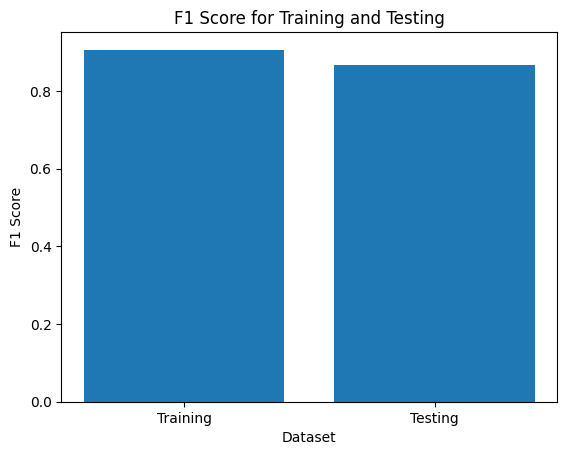

24/24 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8833
Accuracy for testing: 0.883289098739624


In [21]:
from keras.callbacks import EarlyStopping

# Creating the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predicting the target values for the test set
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Calculating the F1 score
f1_test = f1_score(np.argmax(y_test, axis=1), y_pred_test, average='weighted')
print('F1 Score for testing:', f1_test)

# Predicting the target values for the train set
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Calculating the F1 score
f1_train = f1_score(np.argmax(y_train, axis=1), y_pred_train, average='weighted')
print('F1 Score for training:', f1_train)

# Labels for the bars
labels = ['Training', 'Testing']

# Plotting the bar chart
plt.bar(labels, [f1_train, f1_test])

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('F1 Score')
plt.title('F1 Score for Training and Testing')

# Displaying the plot
plt.show()
_, test_accuracy = model.evaluate(X_test, y_test)
print('Accuracy for testing:', test_accuracy)

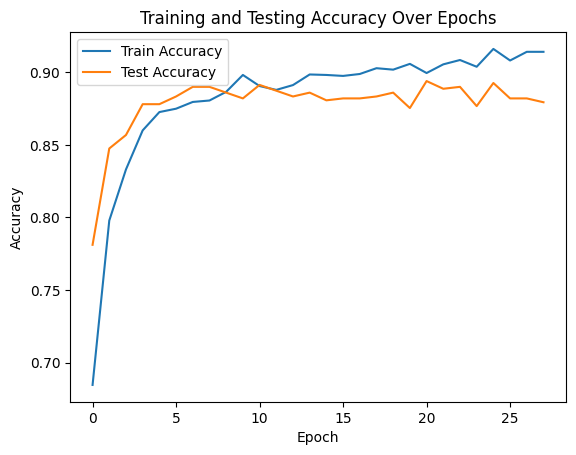

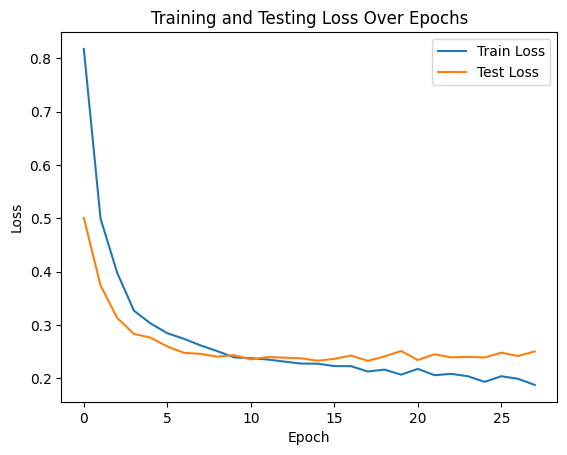

In [22]:

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy Over Epochs')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss Over Epochs')
plt.show()